In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import os
import serial

In [38]:
s = serial.Serial('COM8', baudrate=115200, bytesize=8)
while 1:
    res = s.readline()
    print(res.decode("ascii"))

SerialException: could not open port 'COM8': PermissionError(13, 'Erişim engellendi.', None, 5)

In [4]:
data = pd.read_csv(r"C:\Users\bugra\Desktop\SLASIC\SL-ASIC-NOSE\ML Codes\datas\DATA_DFROBOT\data_baharat.csv", sep=';', encoding='utf-8')

# Display the first few rows to ensure it's loaded correctly
data.head()

,smoke,etoh,odor,co,no2,nh3,voc,h2s,h2,hcho,ch4,label,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,326,276,331,139,31,0,345,338,372,4095,336,0,NaN,0.0,coconut
1,327,274,335,139,32,0,367,340,375,4095,337,0,NaN,1.0,hava
2,325,262,328,144,32,0,368,336,373,4095,336,0,NaN,2.0,kekik
3,325,278,329,144,29,0,366,341,374,4095,335,0,NaN,3.0,kimyon
4,327,277,335,141,34,0,365,336,374,4095,336,0,NaN,4.0,nane


In [5]:
X = data.iloc[:,:11]
y = data.iloc[:, 11]
print(X)

      smoke   etoh   odor   co   no2   nh3   voc   h2s   h2   hcho   ch4
0       326    276    331  139    31     0   345   338  372   4095   336
1       327    274    335  139    32     0   367   340  375   4095   337
2       325    262    328  144    32     0   368   336  373   4095   336
3       325    278    329  144    29     0   366   341  374   4095   335
4       327    277    335  141    34     0   365   336  374   4095   336
...     ...    ...    ...  ...   ...   ...   ...   ...  ...    ...   ...
8885   1373   1191   1294  553   429     0  1374  1251  605   4095   464
8886   1373   1185   1291  560   431     0  1373  1253  605   4095   464
8887   1372   1185   1289  560   429     0  1372  1251  603   4095   462
8888   1375   1187   1285  555   430     0  1373  1248  607   4095   457
8889   1370   1183   1286  535   430     0  1369  1248  606   4095   454

[8890 rows x 11 columns]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)
svc_model = svm.SVC(kernel='linear', random_state=42, decision_function_shape="ovo")
svc_model.fit(X_train, y_train)

SVC(decision_function_shape='ovo', kernel='linear', random_state=42)

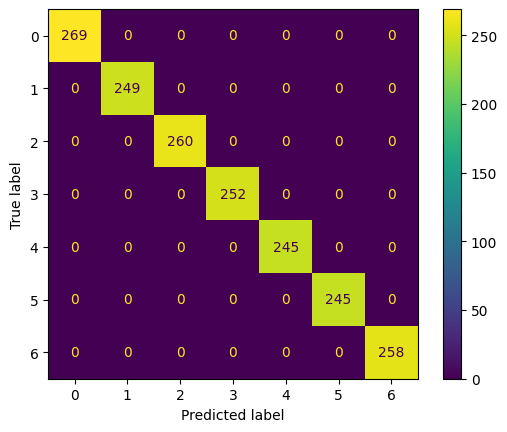

In [20]:
#print(svc_model.coef_)
#print(svc_model.intercept_)
pred = svc_model.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=svc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)

disp.plot()

plt.show()

[[ 385.  395.  464.  227.   47.    0.  376.  341.  410. 4095.  395.]
 [ 398.  359.  464.  197.   46.    0.  416.  352.  410. 4095.  363.]
 [ 371.  342.  396.  160.   51.    0.  401.  353.  387. 4095.  373.]
 [ 395.  393.  464.  223.   48.    0.  441.  352.  416. 4095.  398.]
 [ 353.  307.  363.  144.   44.    0.  385.  350.  377. 4095.  357.]
 [ 385.  390.  465.  275.   50.    0.  403.  337.  407. 4095.  391.]
 [ 336.  289.  400.  152.   37.    0.  373.  342.  371. 4095.  340.]
 [ 369.  336.  384.  183.   43.    0.  402.  393.  387. 4095.  374.]
 [ 390.  430.  450.  204.   48.    0.  415.  354.  386. 4095.  396.]
 [ 400.  395.  479.  231.   53.    0.  416.  352.  425. 4095.  413.]
 [ 397.  384.  464.  206.   47.    0.  418.  385.  414. 4095.  402.]
 [ 275.  334.  469.  144.   36.    0.  294.  368.  363. 4095.  368.]
 [ 275.  389.  470.  143.   41.    0.  269.  373.  354. 4095.  368.]
 [ 272.  334.  535.  136.   32.    0.  265.  393.  362. 4095.  366.]
 [ 275.  334.  469.  181.   33.   

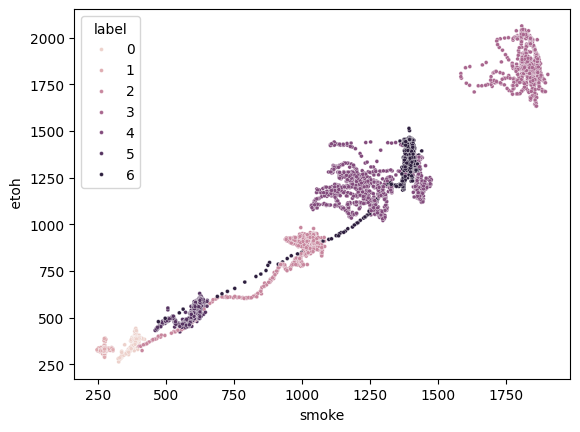

In [24]:
#plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train.iloc[:,0], y = X_train.iloc[:,1], hue = y_train, s=8)
w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-1,1)
y_points = -(w[0]/w[1]) * x_points - b / w[1]


#print(svc_model.coef_)
#print(svc_model.score(X_test, y_test))
print(svc_model.support_vectors_)
#plt.plot(x_points,y_points,c='r')

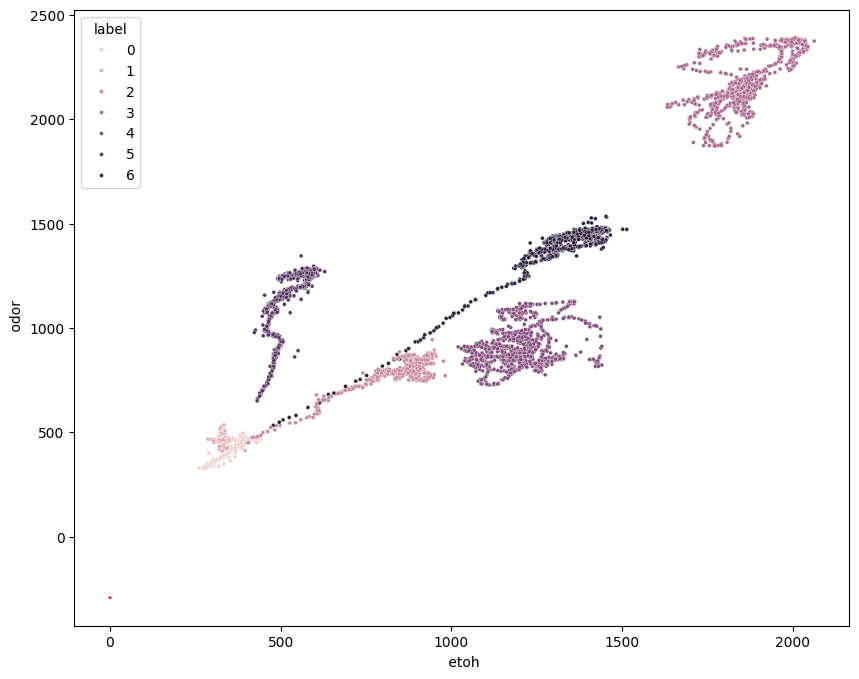

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train.iloc[:,1], y = X_train.iloc[:,2], hue = y_train, s=8)
w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-1,1)
y_points = -(w[1]/w[2]) * x_points - b / w[2]

plt.plot(x_points,y_points,c='r')

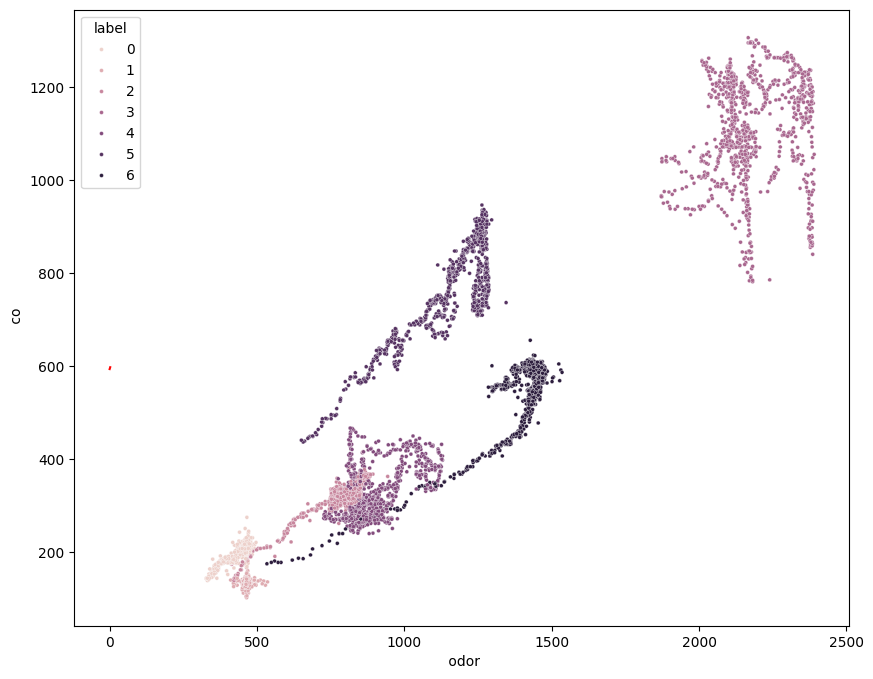

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train.iloc[:,2], y = X_train.iloc[:,3], hue = y_train, s=8)
w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-1,1)
y_points = -(w[2]/w[3]) * x_points - b / w[3]

plt.plot(x_points,y_points,c='r')

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train.iloc[:,3], y = X_train.iloc[:,4], hue = y_train, s=8)
w = svc_model.coef_[0]

w_hat = w / (np.sqrt(np.sum(w ** 2)))
margin = 1 / np.sqrt(np.sum(w ** 2))

new_points_up   = hyperplane_points + w_hat * margin
new_points_down = hyperplane_points - w_hat * margin

b = svc_model.intercept_[0]
x_points = np.linspace(-1,1)
y_points = -(w[3]/w[4]) * x_points - b / w[4]

plt.plot(x_points,y_points,c='r')